## Importing libralries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
import datetime
from textblob import TextBlob

## Loading and inspecting data

In [2]:

social_df = pd.read_csv('sentimentdataset.csv')
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Sentiment     732 non-null    object
 4   Timestamp     732 non-null    object
 5   User          732 non-null    object
 6   Platform      732 non-null    object
 7   Hashtags      732 non-null    object
 8   Retweets      732 non-null    int64 
 9   Likes         732 non-null    int64 
 10  Country       732 non-null    object
 11  Year          732 non-null    int64 
 12  Month         732 non-null    int64 
 13  Day           732 non-null    int64 
 14  Hour          732 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 85.9+ KB


In [3]:
social_df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


## Cleaning data

In [4]:
social_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
social_df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [5]:
social_df_cleaned = social_df.copy()
social_df_cleaned['Sentiment'] = social_df_cleaned['Sentiment'].str.strip().str.capitalize()
social_df_cleaned['Platform'] = social_df_cleaned['Platform'].str.strip().str.capitalize()
social_df_cleaned['Hashtags'] = social_df_cleaned['Hashtags'].str.lower().str.replace('#', '').str.split()

sentiment_summary = social_df_cleaned.groupby(['Platform', 'Sentiment']).size().unstack().fillna(0)
sentiment_summary


Sentiment,Acceptance,Accomplishment,Admiration,Adoration,Adrenaline,Adventure,Affection,Amazement,Ambivalence,Amusement,...,Tranquility,Triumph,Vibrancy,Whimsy,Whispers of the past,Winter magic,Wonder,Wonderment,Yearning,Zest
Platform,,,,,,,,,,,,,,,,,,,,,
Facebook,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Instagram,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,...,1.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0
Twitter,2.0,0.0,2.0,2.0,0.0,3.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [6]:
all_hashtags = social_df_cleaned['Hashtags'].explode()
hashtag_counts = Counter(all_hashtags)
top_hashtags = hashtag_counts.most_common(10)
top_hashtags

[('serenity', 15),
 ('gratitude', 13),
 ('excitement', 13),
 ('despair', 11),
 ('nostalgia', 11),
 ('contentment', 10),
 ('curiosity', 10),
 ('awe', 9),
 ('grief', 9),
 ('loneliness', 9)]

## Visualise

In [13]:
social_df_cleaned['TextBlob_Polarity'] = social_df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
social_df_cleaned['TextBlob_Subjectivity'] = social_df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Categorize sentiment based on polarity
def categorizedSentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

social_df_cleaned['TextBlob_Sentiment'] = social_df_cleaned['TextBlob_Polarity'].apply(categorizedSentiment)

textblob_path = 'categorizedSentiment.csv'
social_df_cleaned.to_csv(textblob_path, index=False)
textblob_summary = social_df_cleaned['TextBlob_Sentiment'].value_counts()

textblob_summary


TextBlob_Sentiment
Neutral     394
Positive    240
Negative     98
Name: count, dtype: int64

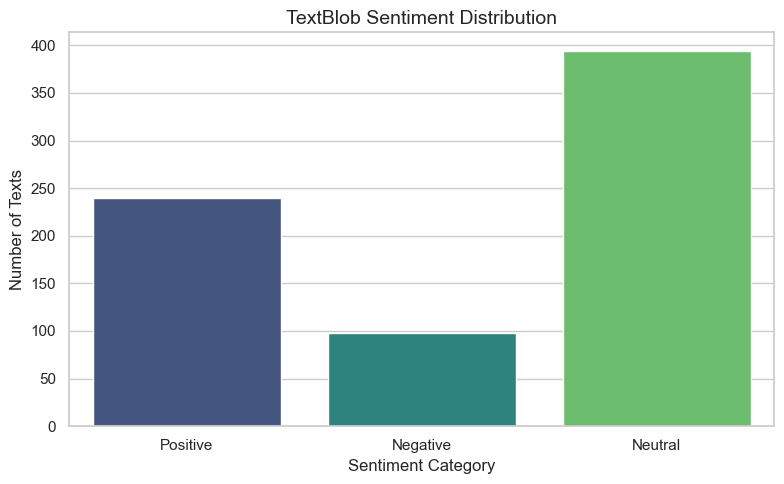

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=social_df_cleaned, x='TextBlob_Sentiment', hue='TextBlob_Sentiment', palette='viridis', legend=False)
plt.title('TextBlob Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Texts')
plt.tight_layout()
plt.show()
